#Proyecto final Métodos Computacionales
**Miguel Angel Rojas Aparicio**


##Propuesta
En la ingeniería Química se tiene el objetivo de desarrollar nuevos productos y algunos de ellos implican conocer el comportamiento de las transferencias de materia y energía en los flujos que se encuentran a su alrededor. Algunos de estos productos, como los desodorantes y perfumes, requieren de modelar la transferencia de masa en un rango determinado de espacio en el cual sus efectos son significativos. Este rango viene determinado por la teoría de Capa Límite, en la cual la transferencia de masa tiene una mayor importancia ante flujos externos para determinar los parámetros de diseño del producto final. Las ecuaciones diferenciales desarrolladas por Blasius para estimar esta capa límite presentan el gran problema de que no pueden resolverse manualmente. La idea sería que por medio de la solución de estas ecuaciones por medio del método de Runge-Kutta de cuarto orden se pueda realizar una modelación de la transferencia de masa para unas condiciones iniciales determinadas a través del tiempo y la variación de concentraciones a través del espacio.

Una vez realizada esta modelación es posible estimar los parámetros necesarios para optimizar el funcionamiento del producto, tales como el tamaño, la concentración de la sustancia a utilizar, los costos y la duración del mismo. Por medio de la obtención de relaciones empíricas entre las variables mencionadas y las modeladas se puede optimizar las características del producto y realizar el diseño en tercera dimensión del producto final a ofrecer al consumidor. Las soluciones obtenidas podrían ser comparados con datos obtenidos empíricamente en la literatura que permitan estimar la utilidad o la cercanía que pueda tener a la realidad para que pudiera aplicarse en esta industria.

##Introducción

La transferencia de masa se da en dos tipos principales: convección y conducción. La conducción se encuentra modelada principalmente por medio de las leyes de Fick que involucran gradientes de concentración y difusividades másicas. A pesar de ello, la mayoría de productos que se desarrollan en la industria le da una mayor importancia a las transferencias de masa convectivas que se desarrollan al entrar en contacto con el aire del medio ambiente. Para modelar este tipo de transferencia es necesario agregar algunos términos convectivos que dependen de la velocidad del fluido a su alrededor y la distancia a la cual se encuentran de la superficie que realiza dicha transferencia. En principio se puede establecer un espacio (capa límite) en el cual esta transferencia es fácilmente modelable y de allí determinar parámetros como los coeficientes convectivos másicos que permiten extrapolar su comportamiento de una manera cercana.

Para un perfume de compuesto A que se encuentra finamente esparcido en una placa ubicada a lo largo del eje x, con una concentración en la superficie $c_{As}=0.5mol/m^3$ se realiza el análisis de la capa límite másica a una sustancia de sus alrededores a una velocidad de $ V_∞=150cm/s$ y con una concentración del compuesto a una distancia suficientemente lejana $c_{A∞} = 0.1 mol/m^3$. La difusividad másica del compuesto, en su mayor parte etanol, corresponde a $102*10^{-3} cm^2/s$ a 20°C y 1atm. Debido a que se va a realizar la difusión en el aire se puede asumir que la difusividad másica es equivalente a la viscosidad cinemática: $D_{AB}=\nu$

Figura 1. Descripción del problema
![](https://raw.githubusercontent.com/marojas11/MC/master/Proyecto/Proyecto.png)

Partiendo de la segunda ley de Fick y teniendo en cuenta el término de transferencia convectiva en medio de la capa límite se puede determinar una ecuación diferencial que permita estimar el tamaño de la capa límite y los parámetros para el cálculo de los coeficientes convectivos.

$$v_x\frac{ ∂C_A}{∂x}+v_y\frac{∂C_A}{∂y}=D_{AB}\frac{∂^2 C_A}{∂y^2} $$

Para facilitar el trabajo de las variables se procede con la adimensionalización del espacio en términos de la velocidad de flujo de los alrededores $v_∞$ y la viscosidad cinemática $υ$

$$η=y/2 \sqrt{v_∞/υx}$$

Con base en esta variable adimensional se define la función de flujo de masa a partir de la cual se definen las velocidades y las concentraciones por medio de la analogía en el comportamiento de los gradientes de velocidad con los de concentración
$$ψ=f(η) \sqrt{υxv_∞}$$




##Desarrollo

En primer lugar se procede a realizar la derivación simbólica de las velocidades y las concentraciones para realizar el reemplazo en la segunda ley de Fick y obtener la ecuación diferencial a resolver.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Importar el paquete sympy para trabajar variables simbólicas
from sympy import *
#Mejorar el estilo de impresión
init_printing(use_unicode=True)

#Cración de variables simbólicas
vx, vy, D_AB, dx,dy,d2y, eta, y, v_inf, nu,n, x, psi=symbols('vx vy D_AB dx dy d2y eta y v_inf nu n x psi ')

#Definir la función f en términos de eta
f=Function('f')(eta)
#Asumido debido a que los gases tienen un número de Schmidt es aproximadamente uno, Sc=1
D_AB=nu
#Definir eta en n para trabajar las derivadas internas
n=y/2*(v_inf**.5/(nu**.5*x**.5))
#Definir la función de flujo en terminos de f
psi=f*(nu**.5)*x**.5*(v_inf)**.5


$$v_x=∂ψ/∂y = ∂ψ/∂\eta *∂\eta/∂y$$


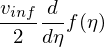

In [3]:
#La velocidad se obtiene por medio de la derivada de al función de flujo en y. 
#nsimplify convierte en números racionales las potencias y los números que se encuentran en los cálculos 
vx=nsimplify(psi.diff(eta)*n.diff(y))  
#eval imprime lo que se obtuvo para vx
eval("vx")


$$v_y=-∂ψ/∂x= -f*∂(\sqrt{υxv_∞})/∂x-∂f/∂\eta *∂\eta/∂x$$



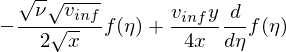

In [4]:
#La velocidad en y se obtiene en la derivada de la función de flujo
vy=simplify(nsimplify(-(diff(psi,x)+n.diff(x)*nu**.5*psi.diff(eta)/nu**.5)))
eval("vy")

$$∂C_A/∂x=∂v_x/∂x$$

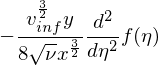

In [5]:
#La derivada de la concentración en x se obtiene al derivar la velocidad de x en x por analogía con la capa hidráulica
dx=simplify(nsimplify(n.diff(x)*diff(f.diff(eta),eta)*vx/f.diff(eta)))
simplify(nsimplify(n.diff(x)*diff(f.diff(eta),eta)*vx/f.diff(eta)))

$$∂C_A/∂y=∂v_x/∂y$$

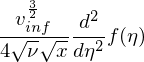

In [6]:
#La derivada de la concentración en y se obtiene al derivar la velocidad de x en y por analogía con la capa hidráulica
dy=simplify(nsimplify(n.diff(y)*diff(f.diff(eta),eta)*vx/f.diff(eta)))
simplify(nsimplify(n.diff(y)*diff(f.diff(eta),eta)*vx/f.diff(eta)))

$$∂^2C_A/∂y^2=∂^2v_x/∂y^2$$

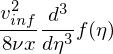

In [7]:
#La segunda derivada de la concentración en y se obtiene al derivar 2 veces la velocidad de x en y por analogía con la capa hidráulica
d2y=simplify(nsimplify(n.diff(y)*diff(diff(f.diff(eta),eta),eta)*dy/diff(f.diff(eta),eta)))
simplify(nsimplify(n.diff(y)*diff(diff(f.diff(eta),eta),eta)*dy/diff(f.diff(eta),eta)))

Al derivar las expresiones para la velocidad y la concentración, se puede evaluar en la ecuación modificada de Fick y se obtiene que
$$-v_x\frac{ ∂C_A}{∂x}-v_y\frac{∂C_A}{∂y}+D_{AB}\frac{∂^2 C_A}{∂y^2}=0 $$

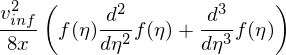

In [8]:
#Simplify reduce los términos de la expresión y los factoriza
simplify(nsimplify(-vx*dx-vy*dy+d2y*D_AB))

$f(\eta)*f^{\prime\prime}(\eta)+f^{\prime\prime\prime}(\eta)=0$

Debido a que la función $f(\eta)$ depende del espacio definimos que las condiciones de frontera corresponden a: 

$
f(0)=f^\prime(0)=0$

$f^\prime(\infty)=2$

Esto se debe a que la concentración adimensional y normalizada corresponde a la mitad de la primera derivada de f

$f^\prime(η)/2=\frac{c_A-c_{A,s}}{c_{A,∞}- c_{A,s}}=\frac{C_A}{C_{A,∞}}$

Aquí tenemos el problema de que para obtenerse una correcta solución a esta ecuación es necesario que la condición inicial para la segunda derivada sea evaluada en 0. Para eso tomamos un valor considerablemente grande para que pueda ser considerado como infinito en este contexto. Este valor puede tomarse como 10 debido a que el orden de los valores de la variable adimensional $\eta$ son mucho menores. 

Para hallar el valor correcto de este valor es necesario realizar una serie de soluciones a la ecuación fijando distintos valores a la segunda derivada evaluada en cero $ f^\prime (0)$hasta encontrar donde los valores de la primera derivada en el valor de 10 $f^{\prime}(10)=2$. Para ello definimos lo siguiente

$$f^{\prime\prime}(\eta)=f2$$
$$f^{\prime}(\eta)=f1$$
$$f(\eta)=f0$$

$$f^{\prime\prime\prime}(\eta)=-f(\eta)*f^{\prime\prime}(\eta)=func3(f0,f2)$$

In [9]:
#Ahora se procede a definir las funciones a trabajar para resolver la ecuación diferencial

#func3 retorna el valor de la tercera derivada de f en términos de eta
def func3(f0,f2):
    return -f0*f2

#RungeKutta cuarto orden aplica el método de resolución para ecuaciones diferenciales por medio del reemplazo a ecuaciones de primer orden. 
#Recibe como parámetros el valor del step eta, el valor t que corresponde al step acumulado. f0 es la función f, f1 es la primera derivada y f2 la segunda
def RungeKutta(eta,t, f0, f1, f2):
    
    #Primer paso de Runge-Kutta
    k1=eta*f1                            #f0=t*f1
    l1=eta*f2                            #f1=t*f2
    m1=eta*func3(f0,f2)                  #f2=t*func3
    
    #Segundo paso de Runge-Kutta
    k2=eta*(f1+l1/2.)
    l2=eta*(f2+m1/2.)
    m2=eta*func3(f0+k1/2.,f2+m1/2.)
    
    #Tercer paso de Runge-Kutta
    k3=eta*(f1+l2/2.)
    l3=eta*(f2+m2/2.)
    m3=eta*func3(f0+k2/2.,f2+m2/2.)
    
    #Cuarto paso de Runge-Kutta
    k4=eta*(f1+l3)           
    l4=eta*(f2+m3)           
    m4=eta*func3(f0+k3,f2+m3) 
    
    #Aumento en los valores de las derivadas
    f0+=(k1+2.*k2+2.*k3+k4)/6.
    f1+=(l1+2.*l2+2.*l3+l4)/6.
    f2+=(m1+2.*m2+2.*m3+m4)/6.
    t+=eta
    return t,f0, f1, f2
    
#Itera recibe como parámetros las iteraciones, el valor maximo de eta, el eta inicial, f0,f1,f2 condiciones iniciales.
def Itera(numIter,eta,t,f0, f1, f2):
    
    #Definir el step del método
    step=eta/numIter
    
    #Inicialización arreglo para almacenar los valores de las derivadaas
    history=np.array([[t,f0, f1, f2]])
    
    #Ciclo de Iteración para el método de RungeKutta
    for __ in range(numIter):
        #Aplicar rungekutta con el lapso de Tiempo calculado
        a=RungeKutta(step,t,f0, f1, f2)
        t=a[0]
        f0=a[1]
        f1=a[2]
        f2=a[3]
        #Almacenar las posiciones y velocidades en cada tiempo
        history=append(history,[[t,f0, f1, f2]],axis=0)
    
    return history
    
    

In [10]:
#Lista de valores para la condición inicial de la segunda derivada en 0 y de la primera derivada en infinito
f2_0=[]
f1_inf=[]
#Valor suficientemente grande para eta
eta=10.

#Ciclo para asignar valores para la segunda derivada en 0 
for i in range(1,2000):
    #Condiciones iniciales
    f0=0.
    f1=0.
    t=0.
    f2_0.append(i/1000.)
    f2=i/1000.
    #Resolución de la ecuación
    x=Itera(1000,eta,t,f0, f1, f2)
    #Almacenar valores de f1 en el infinito
    f1_inf.append(x[-1,2])
    #Buscar el valor más cercano a 2
    if abs(f1_inf[i-1]-2)<0.0005:
        value=f2_0[i-1]

Populating the interactive namespace from numpy and matplotlib
Cuando f1(10)=2, el valor de f2(0)=  1.328


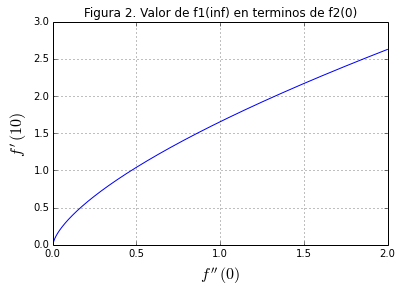

In [14]:
%pylab inline
#Graficar los valores para f1(inf) y f2(0)
plot(f2_0,f1_inf)
grid()
title("Figura 2. Valor de f1(inf) en terminos de f2(0)")
xlabel('$f^{\ \prime \prime}(0)$', size=16)
ylabel('$f^{\  \prime}(10)$', size=16)

print "Cuando f1(10)=2, el valor de f2(0)= ",value

Una vez conocida la condición de frontera que nos faltaba se procede a resolver la ecuación de Blasius.

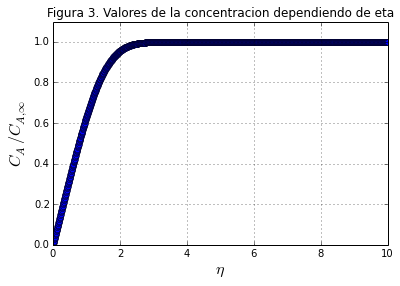

In [17]:
#Condiciones iniciales y constantes
D_AB=102.e-3
eta=10.
f0=0
f1=0
f2=1.328
t=0
#Runge-Kutta cuarto orden
x=Itera(1000,eta,t,f0, f1, f2)

#Graficar los valores de la concentracion adimensional con respecto a eta
plot(x[:,0],x[:,2]/2.,'o')
xlabel('$\eta$', size=16)
ylabel('$C_A/C_{A,\infty}$', size=16)
ylim(0,1.1)
grid()
title("Figura 3. Valores de la concentracion dependiendo de eta")

#Interpolar los valores obtenidos por medio de una interpolación sencilla
from scipy import interpolate
interpol= interpolate.interp1d(x[:,0],x[:,2]/2.,kind='linear')

Para visualizar mejor el perfil de concentraciones en el espacio realizaré el gráfico en las coordenadas x,y


In [18]:
#Crear valores en x,y
xval=linspace(0.01,1,len(x[:,0])/2)
yval=linspace(1e-3,.05,len(x[:,0])/2)
#Generar malla con los valores de cada punto en espacio
xx,yy=meshgrid(xval,yval)
#Generar una matriz para graficar en el espacio 
conc=interpol(yy/2.*sqrt(150./(D_AB*xx)))


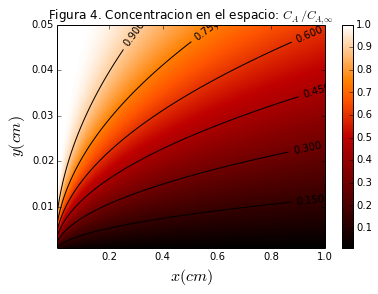

In [19]:
#Graficar la matriz
pcolor(xval,yval,conc,cmap='gist_heat')
colorbar()
#Generar lineas de contorno.
C=contour(xval,yval,conc,colors='k') 
clabel(C)
xlabel('$x(cm)$', size=16)
ylabel('$y(cm)$', size=16)

title("Figura 4. Concentracion en el espacio: $C_A/C_{A,\infty}$")


Una vez resuelta la ecuación diferencial de Blasius se puede estimar el coeficiente convetivo de transferencia de masa, el cual configura el alcance de difusión de la sustancia y que permite decidir los parámetros del producto a desarrollar. Este coeficiente se define de forma análoga a la ley de enfriamiento de Newton.

$h=\frac{\partial C_A}{\partial y}*1/C_{A,\infty}$

Tomando la derivada de la concentración adimensional con respecto a eta y dejando solo en términos de y se puede reemplazar en la ecuación anterior

$\left|\frac{\partial\left(2C_A/C_{A,\infty}\right)}{\partial \left(y/2*\sqrt{xv_\infty/υ}\right)}\right|_{y=0}=f^{\prime\prime}(0)$

$\frac{\partial C_A}{\partial y}=f^{\prime\prime}(0)/4*\sqrt{xv_\infty/υ}$

$h=\frac{f^{\prime\prime}(0)/4*\sqrt{xv_\infty/υ}}{C_{A,\infty}}$

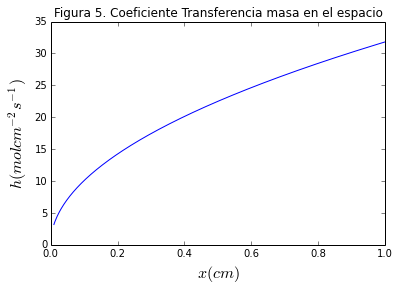

In [20]:
#Valor Cinf=cs-cinf
C_Ainf=0.4
#Calcular valor de h
h=value/4.*sqrt(xval*150./D_AB)/C_Ainf
#Graficar valores de h
plot(xval,h)
xlabel('$x(cm)$', size=16)
ylabel('$h(molcm^{-2}s^{-1})$', size=16)
title("Figura 5. Coeficiente Transferencia masa en el espacio")

##Conclusiones

Los métodos de resolución de ecuaciones diferenciales tal como el de Runge-Kutta facilita y agiliza los procesos de modelación a problemas relacionados con la transferencia de masa en las zonas de mayor influencia como lo son la capa Límite. A pesar de que no se conocía una de las condiciones de frontera fue posible estimarla por medio de iteraciones en el valor de tal condición con presición. El manejo de ecuaciones simbólicas facilitó la derivación de los términos en la construcción de la ecuación diferencial de Blasius y por consecuente generó una mayor facilidad en la programación del método de resolución. También el uso de notación de arreglos evitó el uso exhaustivo de ciclos que pudieran generar una mayor lentitud en la corrida del código. 

La suposición realizada para el valor de la condición de frontera es correcta tal y como se puede evidenciar en la figura 3. El valor obtenido para la capa límite y la condición de frontera de la segunda derivada permiten construir un modelo de comportamiento de las concentraciones en el espacio cercano al cuerpo que emite la sustancia ante una corriente de aire a una velocidad determinada. En base a estos valores se pudo construir el comportamiento del coeficiente convectivo de transferencia de masa que varía a lo largo de la delgada capa de sustancia en la superficie. Los mayores valores de este coeficiente h se encuentran lo más alejados de los bordes posible, pero entre mayor sea el coeficiente el tiempo de retención de la sustancia es menor. Esto puede ser perjucial dependiendo del objetivo del producto a desarrollar, pero en cuerpos curvos genera una mayor retención de la sustancia y realentiza el proceso de transferencia de masa sin anularla.




##Bibliografía

Perry, R. & Green, D. (1987) Perry's Chemical Engineers' Handbook, 6th Ed

Petrila, T. & Trif, D. (2005) Basics of Fluid Mechanics and Introduction to Computational Fluid Dynamics. Springer Science & Business Media. Page 188.

Welty, J. & Wicks, C. & Wilson, R. (2007) Fundamentals of Momentum, Heat, and Mass Transfer. John Wiley & Sons: Fifth Edition